# NBA Game Prediction Model Verson 1
Author: Ben Thornton
Date created: 1/4/2018
Data: https://www.kaggle.com/pablote/nba-enhanced-stats/data, https://www.basketball-reference.com/

Summary: Attempted prediction model to predict games for 17'-18' season based on games from 16'-17' season.

# Import statements

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

# Load Data

In [19]:
df = pd.read_csv('../nba-enhanced-stats/2016-17_teamBoxScore.csv')
# df = pd.read_csv("../2016-17_teamBoxScore.csv")
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,10/25/16,8:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,10/25/16,8:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,10/25/16,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,10/25/16,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,10/25/16,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


In [20]:
df.tail()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
2455,4/12/17,10:30,Regular,Williams,James,Garretson,Ron,Ayotte,Mark,GS,...,51.0504,90.6779,105.1478,-14.4699,0.4100,16.4098,1.2778,72.2222,103.6636,104.0973
2456,4/12/17,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,SAC,...,86.2033,129.7661,107.1981,22.5680,0.5513,22.4806,4.8333,66.6667,88.6210,88.6210
2457,4/12/17,10:30,Regular,Lane,Karl,Wall,Scott,Spooner,Bill,LAC,...,57.0833,107.1981,129.7661,-22.5680,0.4706,21.5724,2.4545,18.1818,88.6210,88.2533
2458,4/12/17,10:30,Regular,Guthrie,David,Adams,Bennie,Davis,Marc,NO,...,57.1875,100.9166,103.9441,-3.0275,0.4271,15.9744,0.8800,16.0000,99.0917,98.6805
2459,4/12/17,10:30,Regular,Guthrie,David,Adams,Bennie,Davis,Marc,POR,...,65.0415,103.9441,100.9166,3.0275,0.4444,15.3563,1.8182,118.1818,99.0917,99.0917


In [21]:
df.shape

(2460, 123)

In [22]:
df.columns

Index([u'gmDate', u'gmTime', u'seasTyp', u'offLNm1', u'offFNm1', u'offLNm2',
       u'offFNm2', u'offLNm3', u'offFNm3', u'teamAbbr',
       ...
       u'opptFIC40', u'opptOrtg', u'opptDrtg', u'opptEDiff', u'opptPlay%',
       u'opptAR', u'opptAST/TO', u'opptSTL/TO', u'poss', u'pace'],
      dtype='object', length=123)

Check for missing data

In [23]:
df.isnull().sum().max()

0

# Find correlations

In [24]:
#correlation matrix

# corrmat = df.corr()
# f, ax = plt.subplots(figsize=(20,18))
# sns.heatmap(corrmat, vmax=.8, square=True)  #, annot=True)

smaller, more focused correaltion matrix; varible interest is team result

In [25]:
# #team result

# k = 9
# cols = corrmat.nlargest(k, 'teamRslt')['teamRslt'].index
# # print(corrmat.nlargest(k, 'teamRslt')['teamRslt'].index)
# f, ax = plt.subplots(figsize=(10,6))
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
#                  annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# # plt.show()

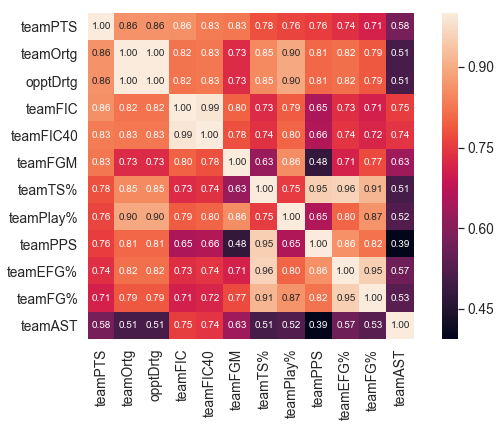

In [26]:
# #team points
k = 12
cols = corrmat.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [27]:
#opponent points

# k = 12
# cols = corrmat.nlargest(k, 'opptPTS')['opptPTS'].index
# f, ax = plt.subplots(figsize=(10,6))
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# # plt.show()

In [28]:
#location; h/a

# k = 12
# cols = corrmat.nlargest(k, 'teamLoc')['teamLoc'].index
# f, ax = plt.subplots(figsize=(10,6))
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [29]:
# team days off

# k = 12
# cols = corrmat.nlargest(k, 'teamDayOff')['teamDayOff'].index
# f, ax = plt.subplots(figsize=(10,6))
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [30]:
# team turnovers

# k = 12
# cols = corrmat.nlargest(k, 'teamTO')['teamTO'].index
# f, ax = plt.subplots(figsize=(10,6))
# cm = np.corrcoef(df[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [31]:
#scatter plots

# cols1 = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA']
# sns.pairplot(df[cols1], size=2.5)
# plt.show()

In [32]:
#prepare x and y

feature_cols = ['teamTREB%', 'teamASST%','teamTS%',
                'teamEFG%', 'teamOREB%', 'teamDREB%',
                'teamTO%', 'teamSTL%', 'teamBLK%', 'teamPPS']
x = df[feature_cols]
y = df['teamRslt']
y.head()

0    Loss
1     Win
2    Loss
3     Win
4     Win
Name: teamRslt, dtype: object

# Prediciton models

Team result model

In [33]:
#train test split, standardize data

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1476, 10)
(984, 10)
(1476,)
(984,)


In [35]:
#knn 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(knn.predict_proba(x_test))

0.6890243902439024
[[0.6 0.4]
 [0.6 0.4]
 [0.4 0.6]
 ...
 [0.2 0.8]
 [0.6 0.4]
 [0.4 0.6]]


In [36]:
#linear svm

clf = LinearSVC(random_state=2)
clf.fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)
pred = (clf.predict(x_test))
#print(pred)
print(metrics.accuracy_score(y_test, pred))

[[ 0.2668933   0.0068105   0.09082854  0.20853638 -0.10687186 -0.11492564
  -0.12058096  0.09218746  0.01287343  0.45736395]]
[-1.69703382]
0.6636178861788617


In [37]:
#random forrest classifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
print(clf.feature_importances_)

[0.15470018 0.05855917 0.11807442 0.11935356 0.05227045 0.05542572
 0.09822776 0.07778418 0.07912499 0.18647956]


In [39]:
pred = clf.predict(x_test)
#print(pred)
#print(clf.predict_proba(x_test))
print(metrics.accuracy_score(y_test, pred))

0.7327235772357723


In [40]:
# Gradient Treee Boosting

clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
clfgtb.score(x_test, y_test)

0.7916666666666666

We'll use Gradient Tree Boosting

# Apply model to this current season

In [41]:
df2 = pd.read_csv("../nba-enhanced-stats/2017-18_teamBoxScore.csv")
df2.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,BOS,...,55.5208,101.7143,98.7227,2.9916,0.4176,14.6154,1.1176,17.6471,100.2809,99.8648
1,2017-10-17,08:00,Regular,Forte,Brian,Smith,Michael,McCutchen,Monty,CLE,...,62.5519,98.7227,101.7143,-2.9916,0.3956,17.7778,2.0000,91.6667,100.2809,100.2809
2,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,HOU,...,86.2033,118.0353,119.0108,-0.9755,0.4725,24.2442,2.0000,29.4118,102.5117,102.9406
3,2017-10-17,10:30,Regular,Maddox,Tre,Garretson,Ron,Foster,Scott,GS,...,81.9038,119.0108,118.0353,0.9755,0.4700,19.1309,2.1538,69.2308,102.5117,102.0863
4,2017-10-18,07:00,Regular,Davis,Marc,Boland,Matt,DeRosa,Joe,CHA,...,70.7113,103.0506,90.9270,12.1236,0.4271,17.8731,2.6667,155.5556,98.9805,99.8123


Lets see how the new data tests.

In [ ]:
#prepare x and y

new_feature_cols = ['teamTREB%', 'teamASST%','teamTS%',
                'teamEFG%', 'teamOREB%', 'teamDREB%',
                'teamTO%', 'teamSTL%', 'teamBLK%', 'teamPPS']
x_new = df2[new_feature_cols]
y_new = df2['teamRslt']
x.head()
y.head()

0    Loss
1     Win
2    Loss
3     Win
4     Win
Name: teamRslt, dtype: object

In [57]:
pred = clf.predict(x_new)
print(metrics.accuracy_score(y_new, pred))
feat_imp = np.stack([new_feature_cols, clf.feature_importances_], axis=1)
print(np.sort(feat_imp, axis=0)[::-1])

0.7666666666666667
[['teamTS%' '0.18647956081735553']
 ['teamTREB%' '0.15470017910825445']
 ['teamTO%' '0.11935355546140887']
 ['teamSTL%' '0.11807442068445995']
 ['teamPPS' '0.09822776374494542']
 ['teamOREB%' '0.07912499025704148']
 ['teamEFG%' '0.07778418472598517']
 ['teamDREB%' '0.058559174944532374']
 ['teamBLK%' '0.05542571970798839']
 ['teamASST%' '0.052270450548028355']]


In [60]:
# gradient tree boosting

clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x, y)
print(clfgtb.score(x_new, y_new))
feature_importances = np.stack([new_feature_cols, clfgtb.feature_importances_], axis=1)
print(np.sort(feature_importances, axis=0)[::-1])

0.8142276422764227
[['teamTS%' '0.27']
 ['teamTREB%' '0.14']
 ['teamTO%' '0.14']
 ['teamSTL%' '0.1']
 ['teamPPS' '0.1']
 ['teamOREB%' '0.08']
 ['teamEFG%' '0.07']
 ['teamDREB%' '0.05']
 ['teamBLK%' '0.03']
 ['teamASST%' '0.02']]


Save the model for future use.

In [45]:
filename = 'nba_pred_modelv1.sav'
pickle.dump(clfgtb, open(filename, 'wb'))

# Game predictions for 1/5/18

In [ ]:
#games
games = ['PHX1 vs SAS2', 'DET1 vs PHI2', 'MIN1 vs BOS2', 'NY1 vs MIA2', 'TOR1 vs MIL2', 'CHI1 vs DAL2', 'UTA1 vs DEN2', 'WSH1 vs MEM2', 'ATL1 vs POR2', 'CHA1 vs LAL2']

g1 = [[101.3, 111.9, 22.3, 15.9, 11.3, 87.1]]
g2 = [[108.4, 106.7, 18.7, 14.4, 10.3, 86.0]]
g3 = [[103.4, 109.8, 18.0, 13.2, 10.3, 84.8]]
g4 = [[102.2, 108.0, 20.8, 15.3, 10.8, 86.0]]
g5 = [[105.9, 105.4, 22.1, 13.9, 9.4, 86.5]]
g6 = [[101.6, 108.7, 19.2, 13.8, 9.4, 88.6]]
g7 = [[107.9, 106.8, 20.1, 14.4, 8.4, 82.4]]
g8 = [[98.9, 106.4, 21.7, 13.7, 9.9, 86.1]]
g9 = [[102.5, 110.9, 19.7, 15.5, 9.5, 84.7]]
g10 = [[106.7, 107.4, 18.1, 13.1, 10.5, 86.4]]

In [ ]:
nba_pred_modelv1 = pickle.load(open(filename, 'rb'))

In [ ]:
pred1 = nba_pred_modelv1.predict(g1)
prob1 = nba_pred_modelv1.predict_proba(g1)
print(pred1)
print(prob1)

In [ ]:
pred2 = nba_pred_modelv1.predict(g2)
prob2 = nba_pred_modelv1.predict_proba(g2)
print(pred2)
print(prob2)

In [ ]:
pred3 = nba_pred_modelv1.predict(g3)
prob3 = nba_pred_modelv1.predict_proba(g3)
print(pred3)
print(prob3)

In [ ]:
pred4 = nba_pred_modelv1.predict(g4)
prob4 = nba_pred_modelv1.predict_proba(g4)
print(pred4)
print(prob4)

In [ ]:
pred5 = nba_pred_modelv1.predict(g5)
prob5 = nba_pred_modelv1.predict_proba(g5)
print(pred5)
print(prob5)

In [ ]:
pred6 = nba_pred_modelv1.predict(g6)
prob6 = nba_pred_modelv1.predict_proba(g6)
print(pred6)
print(prob6)

In [ ]:
pred7 = nba_pred_modelv1.predict(g7)
prob7 = nba_pred_modelv1.predict_proba(g7)
print(pred7)
print(prob7)

In [ ]:
pred8 = nba_pred_modelv1.predict(g8)
prob8 = nba_pred_modelv1.predict_proba(g8)
print(pred8)
print(prob8)

In [ ]:
pred9 = nba_pred_modelv1.predict(g9)
prob9 = nba_pred_modelv1.predict_proba(g9)
print(pred9)
print(prob9)

In [ ]:
pred10 = nba_pred_modelv1.predict(g10)
prob10 = nba_pred_modelv1.predict_proba(g10)
print(pred10)
print(prob10)

In [ ]:
d = {'Game': games, 'Prediction':[pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, pred10], 'Probability (1, 2)': [prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9, prob10], 'Actual Result': [2 , 2, 2, 1, 1, 1, 2, 1, 2, 1]}
df3 = pd.DataFrame(data = d)
df3

5/10 games predicted correctly.